In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

covid_path = "Resources/COVID_19.csv"
GDP_path = "Resources/Global_GDP.csv"
cities_path = "Resources/worldcities.csv"

COVID_data = pd.read_csv(covid_path)
GDP_data = pd.read_csv(GDP_path)
cities_data = pd.read_csv(cities_path)
COVID_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,08/10/2020,8,10,2020,68,1,Afghanistan,AF,AFG,38041757.0,Asia,1.172396
1,07/10/2020,7,10,2020,62,2,Afghanistan,AF,AFG,38041757.0,Asia,1.059362
2,06/10/2020,6,10,2020,145,5,Afghanistan,AF,AFG,38041757.0,Asia,1.083020
3,05/10/2020,5,10,2020,44,0,Afghanistan,AF,AFG,38041757.0,Asia,0.780721
4,04/10/2020,4,10,2020,7,4,Afghanistan,AF,AFG,38041757.0,Asia,0.665059
...,...,...,...,...,...,...,...,...,...,...,...,...
47684,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47685,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47686,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47687,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [2]:
COVID_data = COVID_data.rename(columns={'countriesAndTerritories': 'Countries'})
COVID_country = COVID_data.groupby('Countries')
COVID_sum = COVID_country.sum()
COVID_sum = COVID_sum[['cases','deaths']]
COVID_sum

,cases,deaths
Countries,,
Afghanistan,39616,1470
Albania,14730,407
Algeria,52520,1779
Andorra,2568,53
Angola,5725,211
...,...,...
Vietnam,1099,35
Western_Sahara,766,1
Yemen,2053,594


In [3]:
COVID_per = COVID_data.loc[(COVID_data['dateRep'] == '08/10/2020')]
COVID_per = COVID_per[['Countries','popData2019','countryterritoryCode']]
COVID_per = COVID_per.rename(columns={'popData2019':'Population 2019'})
COVID_per

,Countries,Population 2019,countryterritoryCode
0,Afghanistan,38041757.0,AFG
273,Albania,2862427.0,ALB
487,Algeria,43053054.0,DZA
765,Andorra,76177.0,AND
974,Angola,31825299.0,AGO
...,...,...,...
46656,Vietnam,96462108.0,VNM
46935,Western_Sahara,582458.0,ESH
47101,Yemen,29161922.0,YEM
47283,Zambia,17861034.0,ZMB


In [4]:
COVID_final = pd.merge(COVID_sum, COVID_per, how='inner',on='Countries')
COVID_final['Cases per 100,000 People'] = round(COVID_final['cases']/COVID_final['Population 2019'] * 100000,2)
COVID_final['Deaths per 100,000 People'] = round(COVID_final['deaths']/COVID_final['Population 2019'] * 100000,2)
COVID_final = COVID_final.rename(columns={'cases':'Cases','deaths':'Deaths','countryterritoryCode':'Country Code'})
COVID_final['Deaths per 1000 Cases'] = round(COVID_final['Deaths'] / COVID_final['Cases'] * 1000,2)
COVID_final

,Countries,Cases,Deaths,Population 2019,Country Code,"Cases per 100,000 People","Deaths per 100,000 People",Deaths per 1000 Cases
0,Afghanistan,39616,1470,38041757.0,AFG,104.14,3.86,37.11
1,Albania,14730,407,2862427.0,ALB,514.60,14.22,27.63
2,Algeria,52520,1779,43053054.0,DZA,121.99,4.13,33.87
3,Andorra,2568,53,76177.0,AND,3371.10,69.57,20.64
4,Angola,5725,211,31825299.0,AGO,17.99,0.66,36.86
...,...,...,...,...,...,...,...,...
203,Vietnam,1099,35,96462108.0,VNM,1.14,0.04,31.85
204,Western_Sahara,766,1,582458.0,ESH,131.51,0.17,1.31
205,Yemen,2053,594,29161922.0,YEM,7.04,2.04,289.33
206,Zambia,15224,334,17861034.0,ZMB,85.24,1.87,21.94


In [5]:
GDP_data = GDP_data[['Country Name','Country Code','2017','2018','2019']]
GDP_data['2017 GDP in Billions'] = GDP_data['2017'] / 1000000000
GDP_data['2018 GDP in Billions'] = GDP_data['2018'] / 1000000000
GDP_data['2019 GDP in Billions'] = GDP_data['2019'] / 1000000000
GDP_data

,Country Name,Country Code,2017,2018,2019,2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions
0,Aruba,ABW,3.056425e+09,NaN,NaN,3.056425,NaN,NaN
1,Afghanistan,AFG,2.019176e+10,1.948438e+10,1.910135e+10,20.191760,19.484385,19.101354
2,Angola,AGO,1.221240e+11,1.013530e+11,9.463542e+10,122.124000,101.353000,94.635416
3,Albania,ALB,1.301969e+10,1.514702e+10,1.527808e+10,13.019693,15.147021,15.278077
4,Andorra,AND,3.000181e+09,3.218316e+09,3.154058e+09,3.000181,3.218316,3.154058
...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,7.245707e+09,7.942962e+09,7.926108e+09,7.245707,7.942962,7.926108
260,"Yemen, Rep.",YEM,2.456133e+10,2.759126e+10,NaN,24.561328,27.591262,NaN
261,South Africa,ZAF,3.495540e+11,3.682890e+11,3.514320e+11,349.554000,368.289000,351.432000
262,Zambia,ZMB,2.586814e+10,2.700524e+10,2.306472e+10,25.868142,27.005239,23.064722


In [6]:
GDP_clean = GDP_data[['Country Name','Country Code','2017 GDP in Billions','2018 GDP in Billions','2019 GDP in Billions']]
GDP_clean = GDP_clean.rename(columns={'Country Name':'Countries'})
GDP_clean

,Countries,Country Code,2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions
0,Aruba,ABW,3.056425,NaN,NaN
1,Afghanistan,AFG,20.191760,19.484385,19.101354
2,Angola,AGO,122.124000,101.353000,94.635416
3,Albania,ALB,13.019693,15.147021,15.278077
4,Andorra,AND,3.000181,3.218316,3.154058
...,...,...,...,...,...
259,Kosovo,XKX,7.245707,7.942962,7.926108
260,"Yemen, Rep.",YEM,24.561328,27.591262,NaN
261,South Africa,ZAF,349.554000,368.289000,351.432000
262,Zambia,ZMB,25.868142,27.005239,23.064722


In [7]:
GDP_clean = GDP_clean.fillna(0)
GDP_clean

,Countries,Country Code,2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions
0,Aruba,ABW,3.056425,0.000000,0.000000
1,Afghanistan,AFG,20.191760,19.484385,19.101354
2,Angola,AGO,122.124000,101.353000,94.635416
3,Albania,ALB,13.019693,15.147021,15.278077
4,Andorra,AND,3.000181,3.218316,3.154058
...,...,...,...,...,...
259,Kosovo,XKX,7.245707,7.942962,7.926108
260,"Yemen, Rep.",YEM,24.561328,27.591262,0.000000
261,South Africa,ZAF,349.554000,368.289000,351.432000
262,Zambia,ZMB,25.868142,27.005239,23.064722


In [8]:
cities_data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [9]:
cities_data = cities_data.loc[(cities_data['capital'] == 'primary')]
cities_data = cities_data.rename(columns={'city':'Capital','lat':'Latitude','iso3':'Country Code'})
cities_clean = cities_data[['Capital','Latitude','Country Code']]
cities_clean = cities_clean.drop_duplicates(subset=['Country Code'],keep='first')
cities_clean

,Capital,Latitude,Country Code
0,Tokyo,35.6850,JPN
2,Mexico City,19.4424,MEX
9,Dhaka,23.7231,BGD
10,Buenos Aires,-34.6025,ARG
12,Cairo,30.0500,EGY
...,...,...,...
599,Hagåtña,13.4745,GUM
600,Al Quds,31.7764,XWB
601,Philipsburg,18.0255,SXM
603,Pristina,42.6666,XKS


In [10]:
COVID_GDP = pd.merge(COVID_final,GDP_clean,how='left',on='Country Code')
Final_data = pd.merge(COVID_GDP,cities_clean,how='left',on='Country Code')
del Final_data['Countries_x']
Final_data = Final_data.rename(columns={'Countries_y':'Country'})
Final_data = Final_data[['Country','Country Code','Cases','Deaths','Deaths per 1000 Cases','Population 2019','Cases per 100,000 People','Deaths per 100,000 People','2017 GDP in Billions','2018 GDP in Billions','2019 GDP in Billions','Capital','Latitude']]
Final_data = Final_data[Final_data.Country.notnull()].reset_index(drop=True)
Final_data = Final_data.fillna('Not Available')
Final_data

,Country,Country Code,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude
0,Afghanistan,AFG,39616,1470,37.11,38041757.0,104.14,3.86,20.191760,19.484385,19.101354,Kabul,34.5167
1,Albania,ALB,14730,407,27.63,2862427.0,514.60,14.22,13.019693,15.147021,15.278077,Tirana,41.3275
2,Algeria,DZA,52520,1779,33.87,43053054.0,121.99,4.13,167.389000,173.758000,169.988000,Algiers,36.7631
3,Andorra,AND,2568,53,20.64,76177.0,3371.10,69.57,3.000181,3.218316,3.154058,Andorra la Vella,42.5
4,Angola,AGO,5725,211,36.86,31825299.0,17.99,0.66,122.124000,101.353000,94.635416,Luanda,-8.8383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,"Venezuela, RB",VEN,80404,671,8.35,28515829.0,281.96,2.35,0.000000,0.000000,0.000000,Caracas,10.501
195,Vietnam,VNM,1099,35,31.85,96462108.0,1.14,0.04,223.780000,245.214000,261.921000,Hanoi,21.0333
196,"Yemen, Rep.",YEM,2053,594,289.33,29161922.0,7.04,2.04,24.561328,27.591262,0.000000,Sanaa,15.3547
197,Zambia,ZMB,15224,334,21.94,17861034.0,85.24,1.87,25.868142,27.005239,23.064722,Lusaka,-15.4166


In [11]:
Final_data.to_csv('Resources/COVID_final_data.csv',index=True)

In [122]:
GDP_data_df = Final_data.loc[Final_data['2019 GDP in Billions'] != 0]
GDP_data_df['2019 GDPx10'] = GDP_data_df['2019 GDP in Billions'] * 10
manx = GDP_data_df['2019 GDPx10'].max()
minx = GDP_data_df['2019 GDPx10'].min()
print(minx,manx)

4.290166052 213744.0


C:\Users\anaro\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


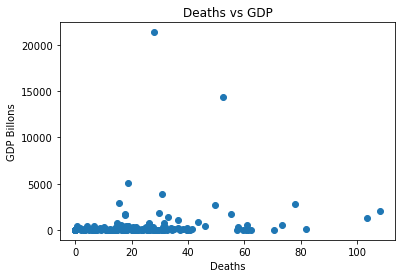

In [141]:
#  Is there any relationship between 2019 GDP with the infection rate/deaths?
y_axis = GDP_data_df['2019 GDP in Billions']
x_axis = GDP_data_df['Deaths per 1000 Cases']

plt.scatter(x_axis, y_axis)
# plt.xlim(0, 80)
# plt.ylim(20, 1000)
plt.title("Deaths vs GDP")
plt.xlabel("Deaths")
plt.ylabel("GDP Billons")
plt.show()

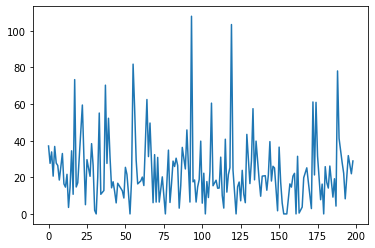

In [121]:
y_axis = GDP_data_df['2019 GDPx10']
x_axis = GDP_data_df['Deaths per 1000 Cases']

plt.plot(x_axis)
# plt.xlim(0, 100)
# plt.ylim(0, 1000)
# plt.title("Deaths vs GDP")
# plt.xlabel("Deaths")
# plt.ylabel("GDP")
plt.show()

In [117]:
GDP_data_df['Deaths per 1000 Cases'].max()

107.99